# FMCG Sales & Channel Performance Analysis

## Objective
Analyze FMCG-style sales data to understand channel performance,
regional contribution, and sales trends over time.

This supports Customer Strategy & Channel Excellence decisions.


In [67]:
%pip install pandas numpy matplotlib



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [69]:
pd.set_option('display.max_columns', None)

## Load Dataset

We use the Sample Superstore dataset from Kaggle.


In [70]:
df = pd.read_csv("data/superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Selecting Relevant Business Columns
We keep only Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, Product Name

In [71]:
df = df[['Order Date', 'Ship Date', 'Sales', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'Product Name']]
df.head()

,Order Date,Ship Date,Sales,Customer ID,Customer Name,Segment,Country,Product Name
0,11/8/2016,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase
1,11/8/2016,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,6/12/2016,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...
3,10/11/2015,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table
4,10/11/2015,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System


## Convert Order Date to Datetime so that we, as a business can track trends over months and years 

In [72]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Ship Date,Sales,Customer ID,Customer Name,Segment,Country,Product Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System


## We rename Sales to Revenue and Segment to Customer Type for better busines understanding

In [73]:
df.rename(columns = {'Sales': 'Revenue', 'Segment': 'Customer Type'}, inplace=True)
df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System


## Create Time Features
Here we add derived columns for year, month and month name which helps us to analyze seasonal pattern and aggregate monthly or yearly sales

In [74]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')
df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct


## Checking Missing values
Now we have to check the missing values as those values can distort KPIs. Thus, we need to handle them carefully as an institution so that we can analyze proper data

In [75]:
print(df.isnull().sum())
df = df.dropna()
df.head()

Order Date       0
Ship Date        0
Revenue          0
Customer ID      0
Customer Name    0
Customer Type    0
Country          0
Product Name     0
Year             0
Month            0
Month_Name       0
dtype: int64


,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct


## Checking duplication of data and removing them
Duplicate data can cause disturbance in our calculation, prediction and future business decisions. So, we check duplicates and remove them.

In [76]:
print("Duplicates before removal:", df.duplicated().sum())
df= df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())
df.head()

Duplicates before removal: 1
Duplicates after: 0


,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct


## Filling missing values with median of the data

In [77]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name
0,2016-11-08,11/11/2016,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov
1,2016-11-08,11/11/2016,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov
2,2016-06-12,6/16/2016,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun
3,2015-10-11,10/18/2015,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct
4,2015-10-11,10/18/2015,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct


## Adding some Time-based information
For our business purpose we can use some metrics to understand the business like Shipping Days, Shipping Speed, Order Day, Order Weekday and so on
This will help us visualize the peak and low timings of the sales

In [78]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Speed'] = np.where(df['Shipping Days'] <=2, 'Fast',
                                np.where(df['Shipping Days'] <=5, 'Normal',
                                         np.where(df['Shipping Days'] <=10, 'Slow', 'Very Slow')))

df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name,Shipping Days,Shipping Speed
0,2016-11-08,2016-11-11,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov,3,Normal
1,2016-11-08,2016-11-11,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov,3,Normal
2,2016-06-12,2016-06-16,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun,4,Normal
3,2015-10-11,2015-10-18,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct,7,Slow
4,2015-10-11,2015-10-18,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct,7,Slow


In [79]:
df['Order Day'] = df['Order Date'].dt.day_name()
df['Order_Weekday'] = df['Order Date'].dt.weekday
df['Is_Weekend'] = np.where(df['Order_Weekday'] >=5, 'Yes','No')
df['Quarter']=df['Order Date'].dt.quarter
df['Season']=np.where(df['Quarter'].isin([12,1,2]),'Winter', 
                      np.where(df['Quarter'].isin([3,4,5]), 'Spring', 
                               np.where(df['Quarter'].isin([6,7,8]), 'Summer', 'Fall')))

## Adding Customer Insights
Adding some customer insights will help obtaining the business decisions even more like Customer Purchase Frequency, Customer Recency

In [80]:
df['Customer_Order_Count']=df.groupby('Customer ID')['Order Date'].transform('count')
df['Customer_Total_Revenue'] = df.groupby('Customer ID')['Revenue'].transform('sum')
df['Customer_Avg_Order_Value'] = df.groupby('Customer ID')['Revenue'].transform('mean')
df['Days_Since_Last_Order'] = (df['Order Date'].max() - df['Order Date']).dt.days
df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name,Shipping Days,Shipping Speed,Order Day,Order_Weekday,Is_Weekend,Quarter,Season,Customer_Order_Count,Customer_Total_Revenue,Customer_Avg_Order_Value,Days_Since_Last_Order
0,2016-11-08,2016-11-11,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov,3,Normal,Tuesday,1,No,4,Spring,5,1148.7800,229.756000,417
1,2016-11-08,2016-11-11,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov,3,Normal,Tuesday,1,No,4,Spring,5,1148.7800,229.756000,417
2,2016-06-12,2016-06-16,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun,4,Normal,Sunday,6,Yes,2,Winter,9,1119.4830,124.387000,566
3,2015-10-11,2015-10-18,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct,7,Slow,Sunday,6,Yes,4,Spring,15,2602.5755,173.505033,811
4,2015-10-11,2015-10-18,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct,7,Slow,Sunday,6,Yes,4,Spring,15,2602.5755,173.505033,811


## Adding Product Revenue Insights

In [81]:
product_revenue = df.groupby('Product Name')['Revenue'].sum()
top_products = product_revenue.nlargest(10).index
df['Is_Top_Product'] = df['Product Name'].isin(top_products)
df.head()

,Order Date,Ship Date,Revenue,Customer ID,Customer Name,Customer Type,Country,Product Name,Year,Month,Month_Name,Shipping Days,Shipping Speed,Order Day,Order_Weekday,Is_Weekend,Quarter,Season,Customer_Order_Count,Customer_Total_Revenue,Customer_Avg_Order_Value,Days_Since_Last_Order,Is_Top_Product
0,2016-11-08,2016-11-11,261.9600,CG-12520,Claire Gute,Consumer,United States,Bush Somerset Collection Bookcase,2016,11,Nov,3,Normal,Tuesday,1,No,4,Spring,5,1148.7800,229.756000,417,False
1,2016-11-08,2016-11-11,731.9400,CG-12520,Claire Gute,Consumer,United States,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2016,11,Nov,3,Normal,Tuesday,1,No,4,Spring,5,1148.7800,229.756000,417,False
2,2016-06-12,2016-06-16,14.6200,DV-13045,Darrin Van Huff,Corporate,United States,Self-Adhesive Address Labels for Typewriters b...,2016,6,Jun,4,Normal,Sunday,6,Yes,2,Winter,9,1119.4830,124.387000,566,False
3,2015-10-11,2015-10-18,957.5775,SO-20335,Sean O'Donnell,Consumer,United States,Bretford CR4500 Series Slim Rectangular Table,2015,10,Oct,7,Slow,Sunday,6,Yes,4,Spring,15,2602.5755,173.505033,811,False
4,2015-10-11,2015-10-18,22.3680,SO-20335,Sean O'Donnell,Consumer,United States,Eldon Fold 'N Roll Cart System,2015,10,Oct,7,Slow,Sunday,6,Yes,4,Spring,15,2602.5755,173.505033,811,False


## Advanced Product Analysis
In this section I am trying to implement Top products per channel, sales growth, contribution percent

In [82]:
top_products = df.groupby(['Customer Segment', 'Product Name'])['Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Revenue', ascending=False)
top_products.head(10)


KeyError: 'Customer Segment'

## Monthly Trend

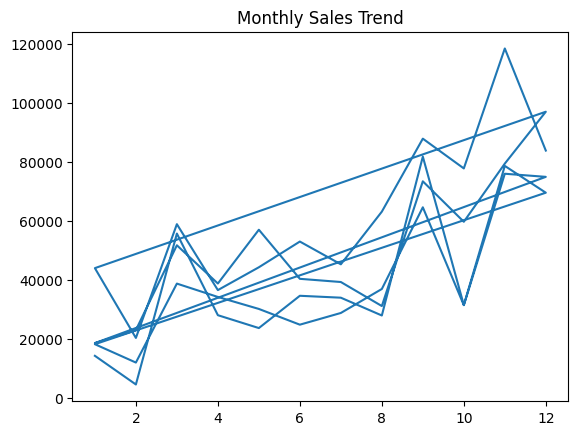

In [ ]:
monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum().reset_index()

plt.figure()
plt.plot(monthly_sales['Month'], monthly_sales['Revenue'])
plt.title("Monthly Sales Trend")
plt.show()


## Importing my dataset into PowerBI

In [ ]:
df.to_csv('cleaned_sales_data.csv', index=False)


## THE END
So, here is the end of PowerBI+Python project designed specially for business decisions for various companies. As a data analyst, it is a passion project for me and I hope i will scale it more as time passes.